In [70]:
import pandas  as pd
import matplotlib.pyplot as plt 
from sklearn.impute  import SimpleImputer
from seedtools import load_seed

In [71]:
data = load_seed("data_science_job.csv",quiet=True).data
data["gender_"] = data["gender"].map({"Male":1,"Female":0})
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target,gender_
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0,1.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0,NaN
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0,NaN
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0,1.0


In [72]:
data.isnull().mean() *100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
gender_                   24.527612
dtype: float64

### Drop columns
##### only when removed data is less than equal to <= 5%and we are left with 95%
##### ratio of the indivisual column should remain same after removing data

## Simple Imputer 
##### You can use fillna also 

### 1) Numerical Column

In [73]:
si1 = SimpleImputer(strategy="constant",fill_value=10.0)
si2  = SimpleImputer(strategy="constant",fill_value=100.0)

In [74]:
si1.fit(data["training_hours"].values.reshape(-1,1))
data["training_hours_10"] =  si1.transform(data["training_hours"].values.reshape(-1,1))

In [75]:
si2.fit(data["training_hours"].values.reshape(-1,1))
data["training_hours_100"] =  si2.transform(data["training_hours"].values.reshape(-1,1))

#### Filling constant values
##### see below  the missing values are less thus all three lines are nearly same thus imputing 10 / 100 does not make much difference 

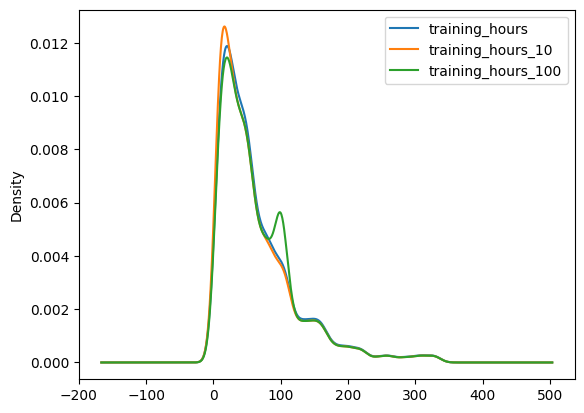

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

data["training_hours"].plot(kind="kde",ax=ax)
data["training_hours_10"].plot(kind="kde",ax=ax)
data["training_hours_100"].plot(kind="kde",ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Filling any stats : mean , median , mode 
##### check the variance after that if it shrinks too much it is a problem but if it aas pass then badhiya !!

In [77]:
si3 = SimpleImputer(strategy="mean")
si4  = SimpleImputer(strategy="median")

In [78]:
si3.fit(data["training_hours"].values.reshape(-1,1))
data["training_hours_mean"] =  si3.transform(data["training_hours"].values.reshape(-1,1))

In [79]:
si4.fit(data["training_hours"].values.reshape(-1,1))
data["training_hours_median"] =  si4.transform(data["training_hours"].values.reshape(-1,1))

In [80]:
print("Orginal training hours ", data["training_hours"].var())
print("training hours mean ", data["training_hours_mean"].var())
print("training hours  median",data["training_hours_median"].var())

Orginal training hours  3586.2881933989406
training hours mean  3442.889083092338
training hours  median 3455.5844212756538


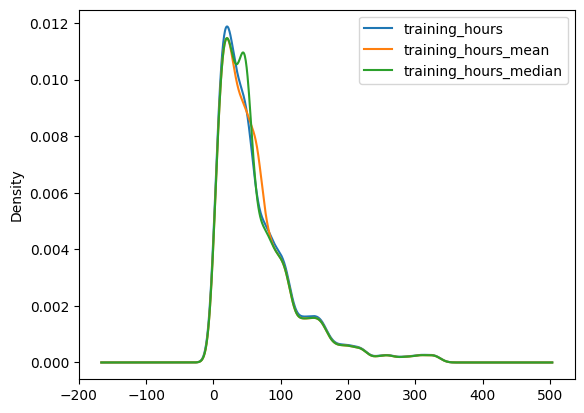

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

data["training_hours"].plot(kind="kde",ax=ax)
data["training_hours_mean"].plot(kind="kde",ax=ax)
data["training_hours_median"].plot(kind="kde",ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 2) Categorical Columnn
#### check the kde plot after that that it must nealy be same 

#### Constant value 

In [82]:
si5 = SimpleImputer(strategy="constant",fill_value="Female")
si6 = SimpleImputer(strategy="constant",fill_value="Other")

In [83]:
data.gender.values.reshape(-1,1).shape

(19158, 1)

In [84]:
si5.fit(data["gender"].values.reshape(-1,1))
data["gender_female"] =  si5.transform(data["gender"].values.reshape(-1,1)).ravel()

si6.fit(data["gender"].values.reshape(-1,1))
data["gender_others"] =  si6.transform(data["gender"].values.reshape(-1,1)).ravel()

<Axes: xlabel='gender_female'>

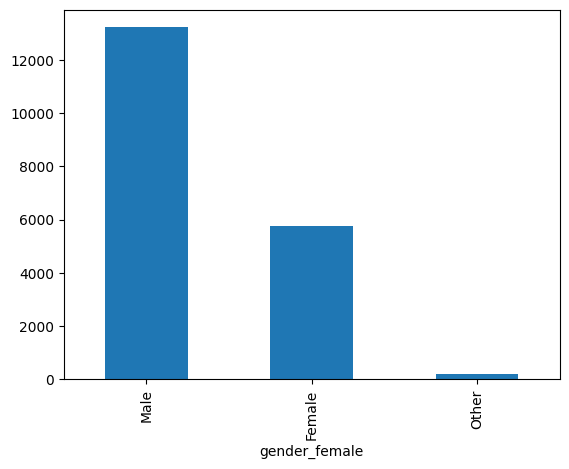

In [85]:
data['gender_female'].value_counts().plot(kind='bar')

<Axes: xlabel='gender_others'>

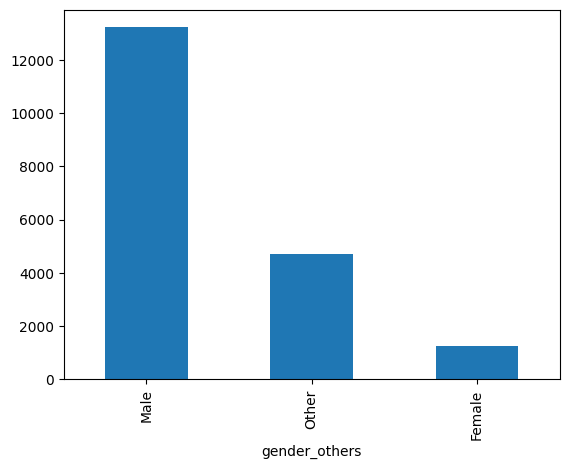

In [86]:
data['gender_others'].value_counts().plot(kind='bar')

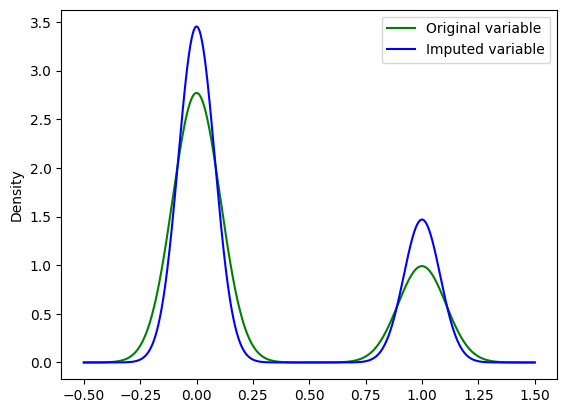

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data["gender"]=='Female']['target'].plot(kind="kde",ax=ax,color='green')
data[data["gender_female"]=='Female']['target'].plot(kind="kde",ax=ax,color='blue')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

##### the result is poor , [ just see the mode filling :  perfect result]

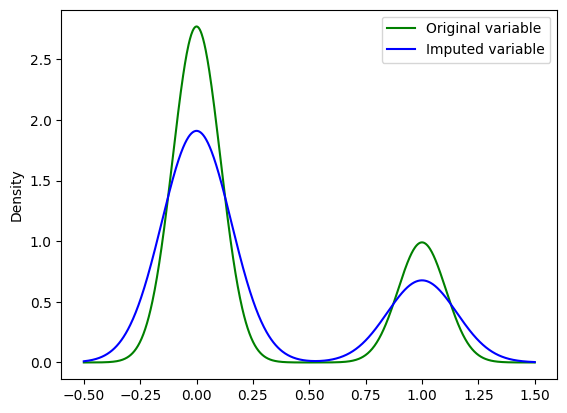

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data["gender"]=='Female']['target'].plot(kind="kde",ax=ax,color='green')
data[data["gender_female"]=='Other']['target'].plot(kind="kde",ax=ax,color='blue')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

##### the result is poor , [ just see the mode filling :  perfect result]

In [89]:
data.gender.mode()

0    Male
Name: gender, dtype: object

#### Mode filling 

In [92]:
si7 = SimpleImputer(strategy="most_frequent")
si7.fit(data.gender.values.reshape(-1,1))

data["gender_new"] =  si7.transform(data.gender.values.reshape(-1,1)).ravel()

In [93]:
si7.statistics_

array(['Male'], dtype=object)

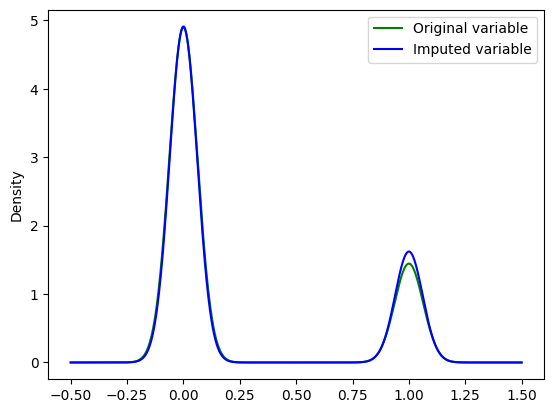

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data["gender"]=='Male']['target'].plot(kind="kde",ax=ax,color='green')
data[data["gender_new"]=='Male']['target'].plot(kind="kde",ax=ax,color='blue')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')